## Data Preprocessing

In [3]:
import pandas as pd
import numpy as np
datafile = "googleplaystore.csv"

In [4]:
df = pd.read_csv(datafile)

In [5]:
len(df)

10841

In [6]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
df.Rating.value_counts() #Ratings range from 1.2 to 4.4 and concentrated on high ratings except a outlier rating "19.0"

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.7        8
1.8        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [13]:
df[df['Rating'] == 19.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [20]:
df.loc[10472] = ['Life Made WI-Fi Touchscreen Photo Frame','LIFESTYLE', 1.9, '19.0', '3.0M', '1000+', 
                 'Free', '0', 'Everyone', 'NaN', 'February 11, 2018', '1.0.19', '4.0 and up']
df.loc[10472] ## Correct the mess row

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                        LIFESTYLE
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                            1000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [22]:
df.iloc[10470:10476]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19.0,3.0M,1000+,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


### *Rough look at relations between each attributes*

In [59]:
#### 删dropna
x = df['Rating'].dropna()
y = df['Size'].dropna()
z = df['Installs'][df.Installs!=0].dropna()
p = df['Reviews'][df.Reviews!=0].dropna()
t = df['Type'].dropna()
price = df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")

AttributeError: 'str' object has no attribute 'log'

### *Market share*

In [66]:
apps_by_categorys = df['Category'].value_counts().sort_values(ascending = False)


### *Relation between category and ratings*

In [52]:
## Initialize dateframe of category vs rating
category = list(df.Category.unique())
average_ratings = []
for item in category:
    i = df[df.Category == item]
    avg_rating = i.Rating.sum()/len(i)
    average_ratings.append(avg_rating)
cate_rate = pd.DataFrame({'Category':category,'Average Rating':average_ratings})
cate_rate

,Category,Average Rating
0,ART_AND_DESIGN,4.156923
1,AUTO_AND_VEHICLES,3.598824
2,BEAUTY,3.390566
3,BOOKS_AND_REFERENCE,3.348918
4,BUSINESS,2.714783
5,COMICS,4.016667
6,COMMUNICATION,3.524548
7,DATING,3.308974
8,EDUCATION,4.360897
9,ENTERTAINMENT,4.126174


In [54]:
## Sort dateframe by rating
cate_rate = cate_rate.sort_values(by = ['Average Rating'], ascending = False)
cate_rate

,Category,Average Rating
8,EDUCATION,4.360897
0,ART_AND_DESIGN,4.156923
9,ENTERTAINMENT,4.126174
17,GAME,4.110227
5,COMICS,4.016667
22,PHOTOGRAPHY,3.966866
21,SHOPPING,3.899231
29,WEATHER,3.881707
20,SOCIAL,3.736271
13,HEALTH_AND_FITNESS,3.725220


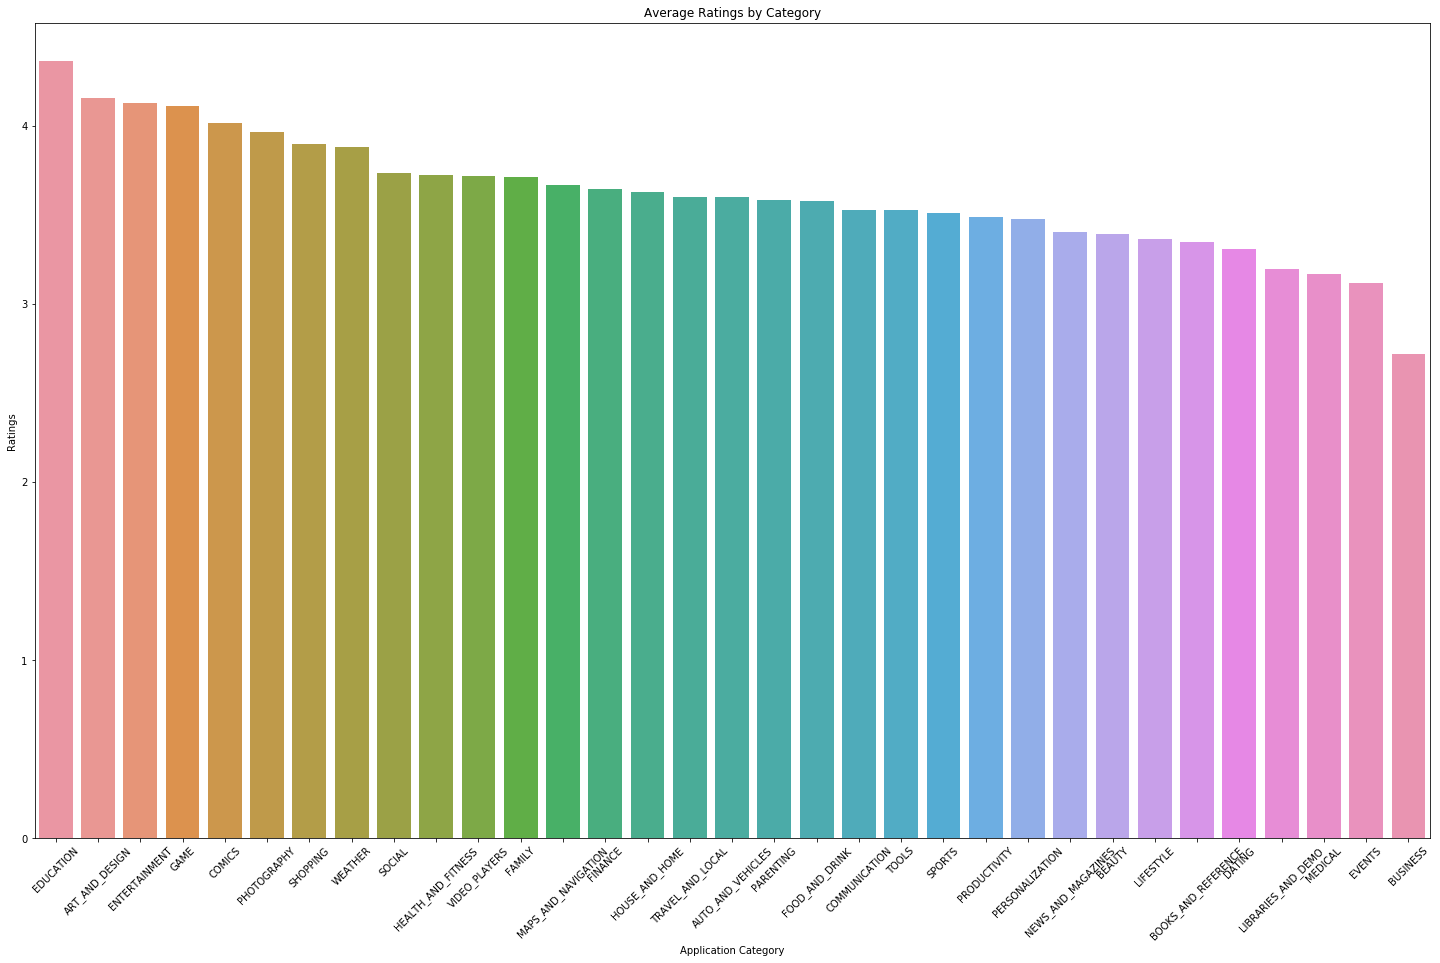

In [58]:
plt.figure(figsize=(25,15))
sns.barplot(x=cate_rate.Category, y=cate_rate['Average Rating'])

plt.xticks(rotation = 45)
plt.xlabel('Application Category')
plt.ylabel('Ratings')
plt.title('Average Ratings by Category')
plt.show()